In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scikitplot as skplt

In [2]:
# Load train dataset
df_train = pd.read_csv('/Users/lauracastellanos/Documents/Proyectos/Fraud Detection/fraudTrain.csv')

In [3]:
# Get dataframe shapes
print('Shape of train dataframe:', df_train.shape)
# Data
print(df_train.info())
print(df_train.describe())

Shape of train dataframe: (1296675, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 n

In [4]:
df_train["trans_date_trans_time"] = pd.to_datetime(df_train["trans_date_trans_time"])
df_train["dob"] = pd.to_datetime(df_train["dob"])
df_train

#Delete columns with confidential information 
df_train.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'trans_date_trans_time'], inplace=True)

In [5]:
# Check unique values of is_fraud column
print('\n Unique values:\n', df_train.is_fraud.unique())
# Count unique values of is_fraud column
print('\n Count unique values:\n', df_train.is_fraud.value_counts())
df_train.dropna(ignore_index=True)
df_train


 Unique values:
 [0 1]

 Count unique values:
 is_fraud
0    1289169
1       7506
Name: count, dtype: int64


,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [6]:
# Calculate percentage of unique values of is_fraud column
print('\n Percentage of unique values:\n', df_train.is_fraud.value_counts(normalize=True))


 Percentage of unique values:
 is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64



 Dataframe for fraud labels:
           Class    Count  Percentage
is_fraud                            
0             0  1289169    0.994211
1             1     7506    0.005789


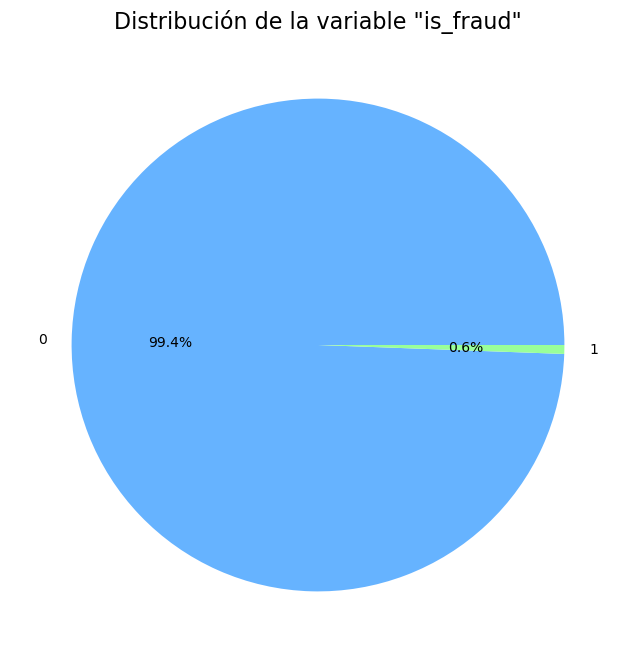

In [7]:
# Create dataframe for statistics of fraud labels
df_fraud_stat = pd.DataFrame({'Class': df_train.is_fraud.unique(),
                             'Count': df_train.is_fraud.value_counts(),
                             'Percentage': df_train.is_fraud.value_counts(normalize=True)})
print('\n Dataframe for fraud labels:\n', df_fraud_stat)

# Crear un gráfico de torta para la variable "is_fraud"
plt.figure(figsize=(8, 8))
df_train['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Distribución de la variable "is_fraud"', fontsize=16)
plt.ylabel('')

plt.show()

####
The data set is highly unbalanced, because normal observations account for more than 99.4% of the train data set and less than 0.6% of the observations are detected as fraudulent transactions.

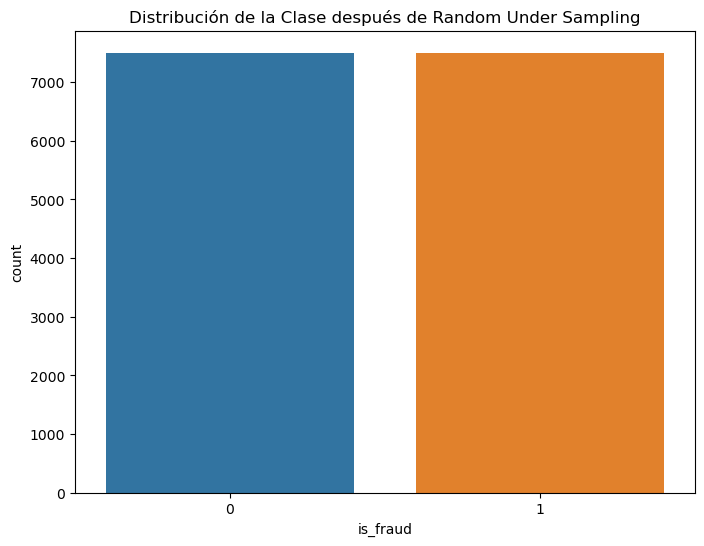

In [8]:
from imblearn.under_sampling import RandomUnderSampler
X = df_train.drop('is_fraud', axis=1)
y = df_train['is_fraud']

# Determine the number of fraudulent transactions
fraudulent_count = y.value_counts()[1]

# Apply random subsampling
rus = RandomUnderSampler(sampling_strategy={0: fraudulent_count, 1: fraudulent_count}, random_state=123)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases equilibradas
df_train = pd.DataFrame(X_resampled, columns=X.columns)
df_train['is_fraud'] = y_resampled

# Visualizar la distribución de 'class' después de aplicar Random Under Sampling
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='is_fraud')
plt.title('Distribución de la Clase después de Random Under Sampling')
plt.show()

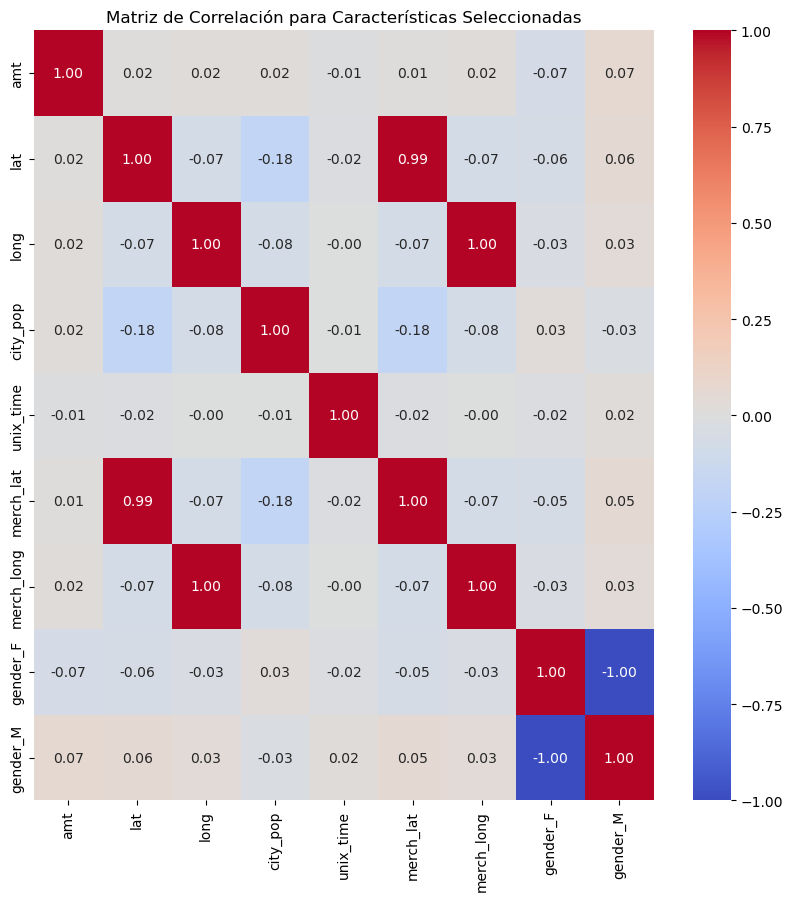

In [9]:
# Selecciona las columnas específicas del DataFrame
selected_features = ['gender', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
df_selected = df_train[selected_features]
df_train_encoded = pd.get_dummies(df_selected)

# Grafica la matriz de correlación
correlation_matrix = df_train_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Características Seleccionadas')
plt.show()

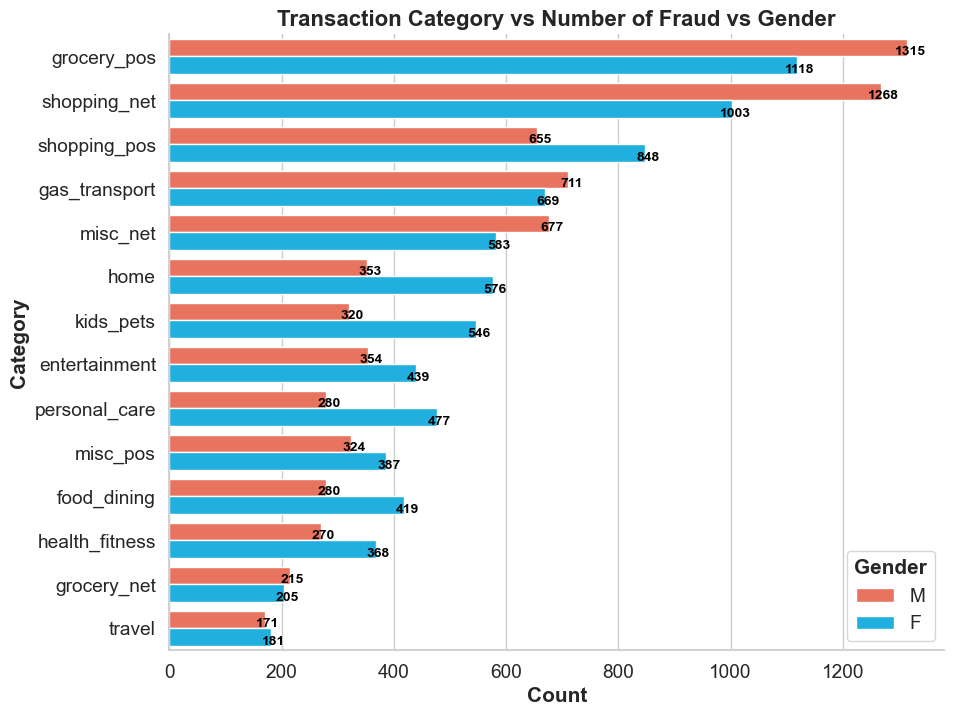

In [10]:
colors = ["#FF6347", "#00BFFF"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.countplot(y='category',
                  data=df_train,
                  hue='gender',
                  palette=colors,
                  order=df_train['category'].value_counts().index,
                  ax=ax
                  )

# Set title, label, legend 
g.set_title('Transaction Category vs Number of Fraud vs Gender', fontdict={'fontsize': 16, 'fontweight': 'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Customize legend title fontweight
legend = g.legend(title='Gender')
legend.get_title().set_fontweight('bold')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2. + 0.1,
            f'{int(width)}',
            ha="center", va="center",
            fontsize=10, fontweight='bold',
            color='black'
            )
# Show plot
plt.show()

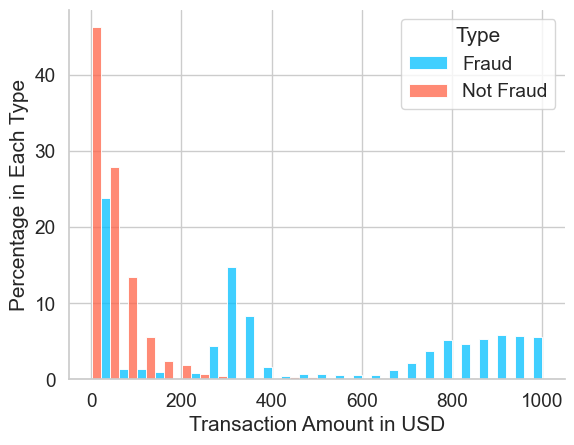

In [11]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df_train[df_train.amt<=1000],
                hue='is_fraud',
                stat='percent',
                multiple='dodge',
                common_norm=False,
                bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

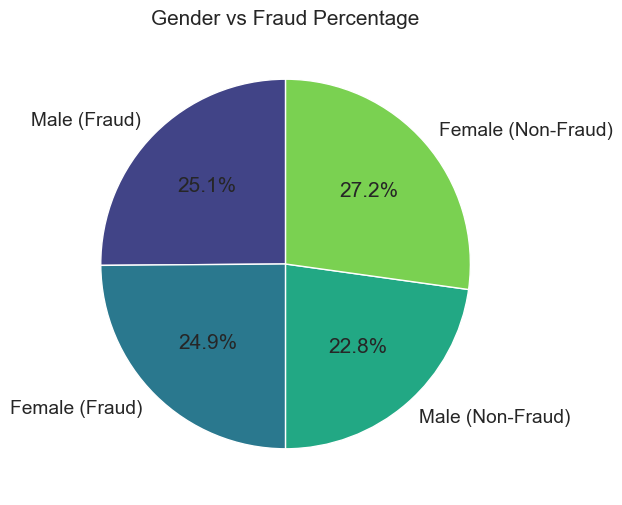

In [12]:
#Gender vs Fraud
plt.figure(figsize=(8, 6))
fraud_percentage = df_train[df_train['is_fraud'] == 1]['gender'].value_counts(normalize=True) * 100
non_fraud_percentage = df_train[df_train['is_fraud'] == 0]['gender'].value_counts(normalize=True) * 100
labels = ['Male (Fraud)', 'Female (Fraud)', 'Male (Non-Fraud)', 'Female (Non-Fraud)']
data = [fraud_percentage['M'], fraud_percentage['F'], non_fraud_percentage['M'], non_fraud_percentage['F']]


# Create graph
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette("viridis", n_colors=len(labels)))
plt.title('Gender vs Fraud Percentage')
plt.title('Gender vs Fraud Percentage')

plt.show()

/var/folders/ks/mm676s7x75b9ld7v0947tbmc0000gn/T/ipykernel_10285/777039818.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(data=df_train,


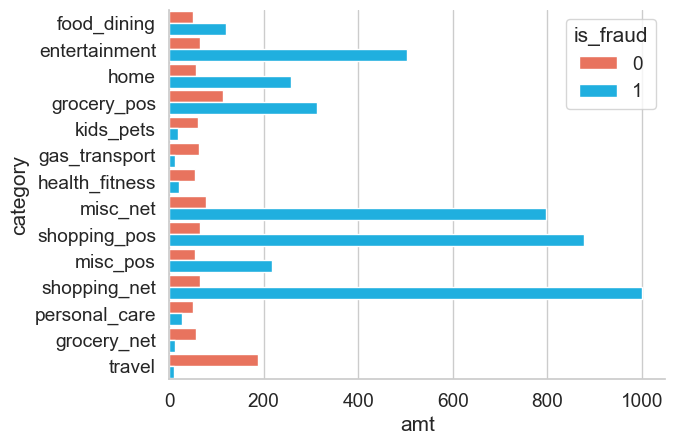

In [13]:
colors = ["#C04C36", "#00163E"]
# Create the stripplot
g = sns.barplot(data=df_train,
                x='amt',
                y='category', 
                hue='is_fraud',
                width=0.9,
                ci=None
             )

## Modeling

In [14]:
features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = df_train[features]
y = df_train['is_fraud']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
# Modelo de preprocesamiento obtenido desde el conjunto de entrenamiento
modelo_prepro = StandardScaler()
modelo_prepro.fit(X_train)

StandardScaler()

In [16]:
# Escalar conjunto entrenamiento
X_train_scaled = modelo_prepro.transform(X_train)
# Escalar conjunto de test (con el modelo de preprocesamiento del conjunto de entrenamiento)
X_test_scaled = modelo_prepro.transform(X_test)

### Árbol de clasificación

In [17]:
# Importar librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
# Construcción del modelo y entrenamiento
np.random.seed(123)
modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Predicción del conjunto de test
y_pred = modelo_tree.predict(X_test)

#Dataframe con datos entrada y predicción
o_pred = pd.concat([X_test,y_test],axis=1)
o_pred['class_pred']=y_pred
o_pred.head()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,class_pred
1137970,89.36,36.3924,-91.9932,1679,1366379840,35.661213,-92.612469,0,0
171562,6.04,44.6001,-84.2931,864,1333199682,44.424650,-84.417700,0,1
527450,31.29,46.3535,-86.6345,765,1345034551,46.516269,-85.688805,0,0
114134,11.00,41.4575,-74.1659,2258,1330967632,41.597033,-74.011656,0,1
721489,59.38,33.2887,-111.0985,2872,1351998088,33.911567,-111.122355,0,0


In [20]:
#Matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[1943  310]
 [ 290 1961]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2253
           1       0.86      0.87      0.87      2251

    accuracy                           0.87      4504
   macro avg       0.87      0.87      0.87      4504
weighted avg       0.87      0.87      0.87      4504



In [22]:
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, precision_score, f1_score
# Calcular métricas
auc_tree = roc_auc_score(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred, zero_division=1) 
raccuracy_tree = accuracy_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred, zero_division=1) 
f1_tree = f1_score(y_test, y_pred, zero_division=1)      

In [23]:
# Obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = modelo_tree.predict_proba(X_test)
y_test_proba_predict[:5,]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

<Figure size 1000x1000 with 0 Axes>

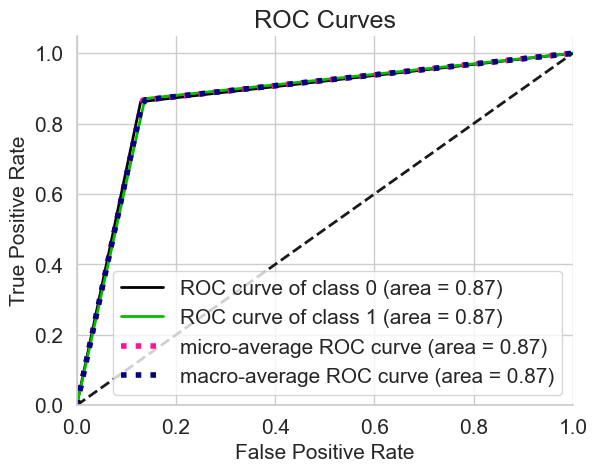

In [24]:
# Curva ROC
plt.figure(figsize=(10, 10))
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## Naive Bayes 

In [25]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo de Naive Bayes
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

GaussianNB()

In [26]:
# entrenar el modelo
modelo_nb.fit(X_train, y_train)

# predecir el conjunto de prueba
y_pred = modelo_nb.predict(X_test)

# crear un dataframe con los datos de entrada y la predicción
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

In [27]:
# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[2160   93]
 [1024 1227]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.79      2253
           1       0.93      0.55      0.69      2251

    accuracy                           0.75      4504
   macro avg       0.80      0.75      0.74      4504
weighted avg       0.80      0.75      0.74      4504



In [29]:
# Calcular métricas
auc_nb= roc_auc_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred, zero_division=1) 
raccuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, zero_division=1) 
f1_nb = f1_score(y_test, y_pred, zero_division=1)  

In [30]:
# Obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = modelo_tree.predict_proba(X_test)

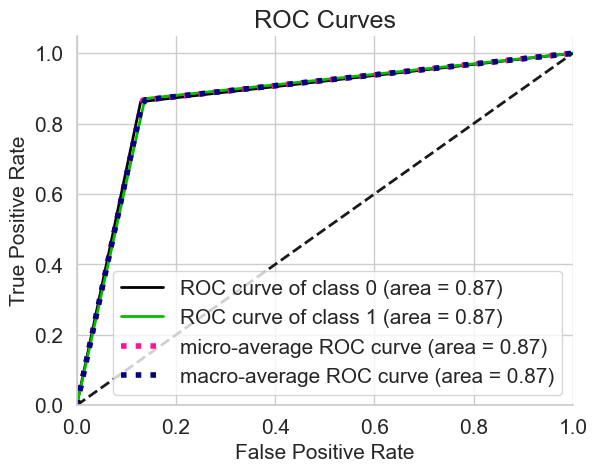

In [31]:
# Curva ROC - NB
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## Random Forest

In [32]:
# Construcción del modelo
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)
modelo_rf = RandomForestClassifier(max_depth=5)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [33]:
# Predicción del conjunto de test
y_pred = modelo_rf.predict(X_test)

# Matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[2188   65]
 [ 545 1706]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2253
           1       0.96      0.76      0.85      2251

    accuracy                           0.86      4504
   macro avg       0.88      0.86      0.86      4504
weighted avg       0.88      0.86      0.86      4504



In [35]:
# Calcular métricas
auc_rf= roc_auc_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred, zero_division=1) 
raccuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, zero_division=1) 
f1_rf = f1_score(y_test, y_pred, zero_division=1) 

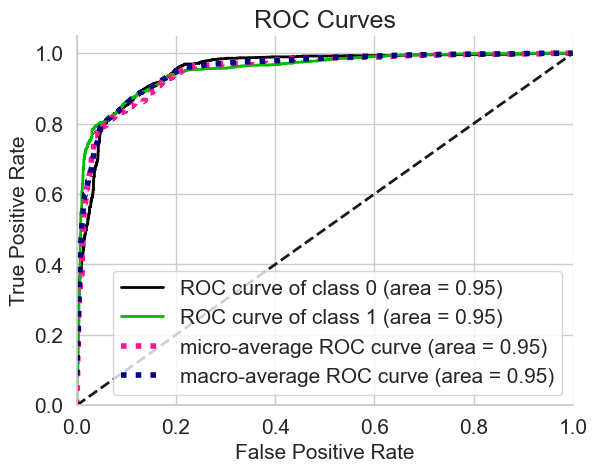

In [36]:
# Obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = modelo_rf.predict_proba(X_test)

# Curva ROC - RF
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## XGBoost 

In [37]:
# Construcción del modelo
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(123)
modelo_xgb = GradientBoostingClassifier()
modelo_xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
# Predicción del conjunto de test
y_pred = modelo_xgb.predict(X_test)

# Matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[2040  213]
 [ 284 1967]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2253
           1       0.90      0.87      0.89      2251

    accuracy                           0.89      4504
   macro avg       0.89      0.89      0.89      4504
weighted avg       0.89      0.89      0.89      4504



In [40]:
# Calcular métricas
auc_xgb= roc_auc_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred, zero_division=1) 
raccuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, zero_division=1) 
f1_xgb = f1_score(y_test, y_pred, zero_division=1) 

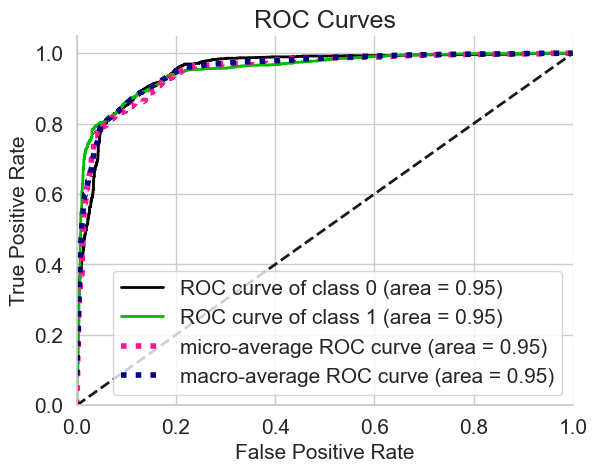

In [41]:
# Curva ROC - XGb 
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## KNN

In [42]:
# Construcción del modelo
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(123)
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [43]:
# Predicción del conjunto de test
y_pred = modelo_knn.predict(X_test_scaled)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[1949  304]
 [ 367 1884]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2253
           1       0.86      0.84      0.85      2251

    accuracy                           0.85      4504
   macro avg       0.85      0.85      0.85      4504
weighted avg       0.85      0.85      0.85      4504



In [45]:
# Calcular métricas
auc_knn= roc_auc_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred, zero_division=1) 
raccuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, zero_division=1) 
f1_knn = f1_score(y_test, y_pred, zero_division=1) 

In [46]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = modelo_knn.predict_proba(X_test_scaled)

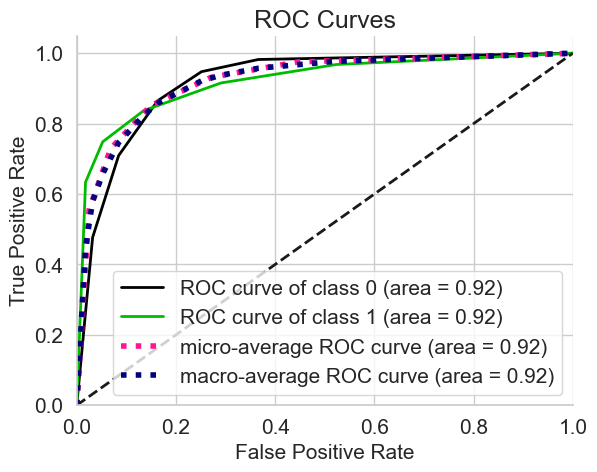

In [47]:
# Curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## Support Vector Machines (SVM)

In [48]:
# Construcción del modelo
from sklearn.svm import SVC

np.random.seed(123)
modelo_svm = SVC(probability=True)
modelo_svm.fit(X_train_scaled, y_train)

SVC(probability=True)

In [49]:
# Predicción del conjunto de test
y_pred = modelo_svm.predict(X_test_scaled)

# Matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[2150  103]
 [ 548 1703]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2253
           1       0.94      0.76      0.84      2251

    accuracy                           0.86      4504
   macro avg       0.87      0.86      0.85      4504
weighted avg       0.87      0.86      0.85      4504



In [51]:
# Calcular métricas
auc_svm= roc_auc_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred, zero_division=1) 
raccuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, zero_division=1) 
f1_svm = f1_score(y_test, y_pred, zero_division=1) 

In [52]:
# Obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = modelo_svm.predict_proba(X_test_scaled)

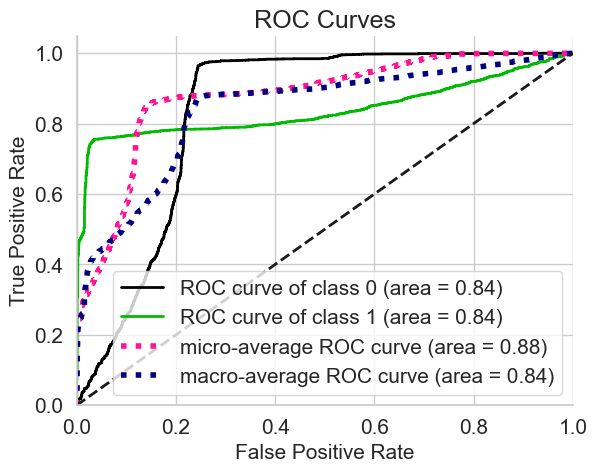

In [53]:
# Curva ROC - SVM
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## Redes Neuronales Artificales (ANN)

In [54]:
# Construcción del modelo
from sklearn.neural_network import MLPClassifier

np.random.seed(123)
modelo_ann = MLPClassifier(max_iter=600)
modelo_ann.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=600)

In [55]:
# Predicción del conjunto de test
y_pred = modelo_ann.predict(X_test_scaled)

# Matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[2096  157]
 [ 494 1757]]


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2253
           1       0.92      0.78      0.84      2251

    accuracy                           0.86      4504
   macro avg       0.86      0.86      0.85      4504
weighted avg       0.86      0.86      0.85      4504



In [57]:
# Calcular métricas
auc_ann= roc_auc_score(y_test, y_pred)
recall_ann = recall_score(y_test, y_pred, zero_division=1) 
raccuracy_ann = accuracy_score(y_test, y_pred)
precision_ann = precision_score(y_test, y_pred, zero_division=1) 
f1_ann = f1_score(y_test, y_pred, zero_division=1) 

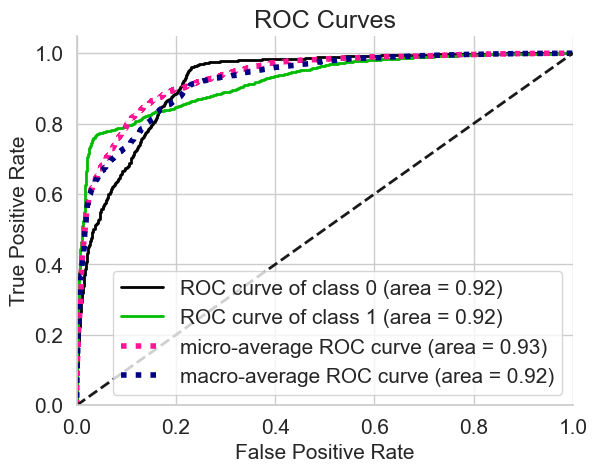

In [58]:
# Obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = modelo_ann.predict_proba(X_test_scaled)

# Curva roc - ANN
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## Gráfico Métricas

          Modelo       AUC    Recall  Accuracy  Precision        F1
0  Decision Tree  0.866787  0.871168  0.866785   0.863496  0.867315
1    Naive Bayes  0.751906  0.545091  0.751998   0.929545  0.687202
2  Random Forest  0.864517  0.757885  0.864565   0.963298  0.848334
3        XGBoost  0.889647  0.873834  0.889654   0.902294  0.887836
4            KNN  0.851015  0.836961  0.851021   0.861060  0.848840
5            SVM  0.855418  0.756553  0.855462   0.942968  0.839537
6            ANN  0.855429  0.780542  0.855462   0.917973  0.843697


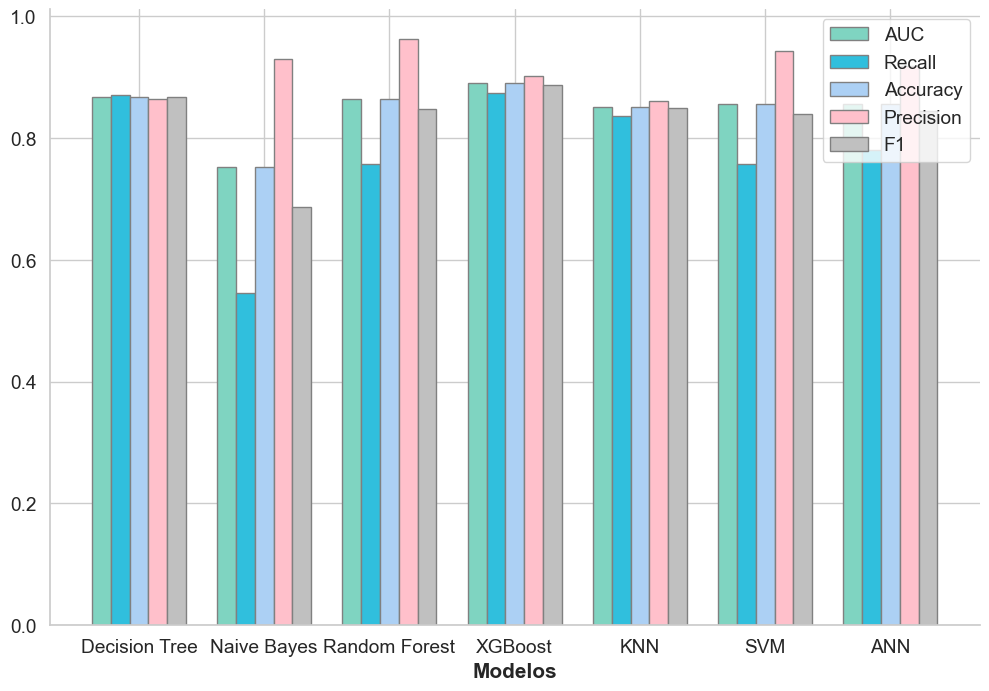

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Modelo': ['Decision Tree', 'Naive Bayes', 'Random Forest', 'XGBoost', 'KNN', 'SVM', 'ANN'],
    'AUC': [auc_tree, auc_nb, auc_rf, auc_xgb, auc_knn, auc_svm, auc_ann],
    'Recall': [recall_tree, recall_nb, recall_rf, recall_xgb, recall_knn, recall_svm, recall_ann],
    'Accuracy': [raccuracy_tree, raccuracy_nb, raccuracy_rf, raccuracy_xgb, raccuracy_knn, raccuracy_svm, raccuracy_ann],
    'Precision': [precision_tree, precision_nb, precision_rf, precision_xgb, precision_knn, precision_svm, precision_ann],
    'F1': [f1_tree, f1_nb, f1_rf, f1_xgb, f1_knn, f1_svm, f1_ann]
})

# Mostrar la tabla
print(resultados)

# Crear un gráfico de barras
barWidth = 0.15
r = np.arange(len(resultados['Modelo']))

plt.figure(figsize=(12, 8))

plt.bar(r, resultados['AUC'], color='#7FD4C1', width=barWidth, edgecolor='grey', label='AUC')
plt.bar(r + barWidth, resultados['Recall'], color='#30BFDD', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r + 2 * barWidth, resultados['Accuracy'], color='#ACD0F4', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r + 3 * barWidth, resultados['Precision'], color='#FFC0CB', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r + 4 * barWidth, resultados['F1'], color='#C0C0C0', width=barWidth, edgecolor='grey', label='F1')

# Personalizar el gráfico
plt.xlabel('Modelos', fontweight='bold')
plt.xticks(r + 2 * barWidth, resultados['Modelo'])
plt.legend()
plt.show()
